In [10]:
import pandas as pd
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv
from mapbox import Geocoder
import regex as re

In [168]:
load_dotenv()
map_box_api = os.getenv("mapbox")

px.set_mapbox_access_token(map_box_api)
geocoder = Geocoder(access_token=map_box_api)

In [83]:
df = pd.read_excel('data/revl_waterstation.xlsx', sheet_name='revl_waterstation')
df_rev = pd.read_csv('data/device_totals.csv', thousands=r',')

In [ ]:
locations = df[['Street','City','State','Zip Code']]
locations['concat'] = locations[['Street','City','State','Zip Code']].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
lcs = locations['concat'].dropna().to_list()

In [50]:
lon = []
lat = []
for l in lcs:
    response = geocoder.forward(l)
    coords = response.json()['features'][0]['center']
    lon.append(coords[0])
    lat.append(coords[1])

In [133]:
df.loc[df['City']=='Fort Bragg', 'Street'] = 'Fort Bragg'
df.loc[df['City']=='Fort Bragg', 'State'] = 'Fort Bragg'

In [86]:
test1 = test.merge(df_rev, how='inner', on='Device ID')
test_1 = test1.rename(columns={' Total ':'Total'})
test_1.Total = test_1.Total.str.strip()
test_1.Total = test_1.Total.str.replace(',','')
test_1.Total = pd.to_numeric(test_1.Total)

In [95]:
test_1.to_csv('income_heat_map_data.csv')

In [ ]:
test_1.to_csv()

In [91]:
map_1 = px.scatter_mapbox(test_1[test_1.Total<10000], lat="lat", lon="lon", color="Total")
map_1.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

In [93]:
map_2 = px.scatter_mapbox(locations.dropna(), lat="lat", lon="lon", color="State")
map_2.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

In [104]:
test_2 = pd.read_csv('data/YE_review.csv')

test_2 = test_2[['Device ID','5/1/2022', '6/1/2022', '7/1/2022', '8/1/2022', '9/1/2022', '10/1/2022', '11/1/2022',]]
to_merge = test_1[['Device ID','Age of Machine','City_y', 'State_y', 'Zip Code_y', 'concat', 'lon', 'lat']]

combo = test_2.merge(to_merge, how='inner', on='Device ID')

In [ ]:
map_3 = px.scatter_mapbox(combo, lat="lat", lon="lon", color="State_y")
map_3.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

In [160]:
to_merge = locations.set_index(pd.RangeIndex(0,7614))
copy = df.set_index(pd.RangeIndex(0,7614))
to_merge = to_merge.fillna('')
copy = copy.fillna('')

test_3 = pd.concat([to_merge, copy], axis=1)

In [167]:
test_3[['lat','lon']]

lat         lon
0     34.704050 -118.149090
1     33.480170 -112.160925
2     34.248680 -118.519425
3     38.613755 -121.271803
4     34.115945 -116.458155
...         ...         ...
7609  35.132123  -78.978481
7610  35.132123  -78.978481
7611  35.132123  -78.978481
7612  35.132123  -78.978481
7613  24.960322  118.382754

[7614 rows x 2 columns]

In [170]:
map_3 = px.scatter_mapbox(locations.dropna(), lat="lat", lon="lon", color="State")
map_3.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue")

In [287]:
import plotly.express as px

In [ ]:
pd.options.display.float_format = '{:,}'.format
income_df = pd.read_csv('data/YE_review.csv')
incomes = income_df[['Device ID.1', 'Location','City', 'State', 'Zip Code', '5/1/2022', '6/1/2022',
       '7/1/2022', '8/1/2022', '9/1/2022', '10/1/2022', '11/1/2022','TOTALS']]
incomes.set_index('Device ID.1', inplace=True)
incomes.rename(columns={'5/1/2022':'May', '6/1/2022':'Jun',
       '7/1/2022':'Jul', '8/1/2022':'Aug', '9/1/2022':'Sept', '10/1/2022':'Oct', '11/1/2022':'Nov'},inplace=True)

for c in ['State', 'May', 'Jun', 'Jul', 'Aug',
       'Sept', 'Oct', 'Nov', 'TOTALS']:
       incomes[c] = incomes[c].str.upper()
       incomes[c] = incomes[c].str.strip()
       incomes[c] = incomes[c].str.replace(',','')
       incomes[c] = incomes[c].str.replace('-', '0')
       if c != 'State':
              incomes[c] = pd.to_numeric(incomes[c])

In [241]:
incomes.head()

Location          City State Zip Code       May  \
Device ID.1                                                                
K3PLK001133  Family Dollar # 8562  Lehigh Acres    FL    33971 19,487.64   
K3PLR100138                 Cal's   SAN ANTONIO    TX    78155 12,605.52   
K3PLK000816                Cal's    SAN ANTONIO    TX    78252 16,946.41   
K3PLK000687                 Cal's        SEGUIN    TX    78240  7,367.06   
K3PLK001132       Mobil Food Mart      Glendale    AZ    85308  7,749.32   

                  Jun       Jul       Aug      Sept       Oct       Nov  \
Device ID.1                                                               
K3PLK001133 19,367.86 19,343.53 18,646.13 20,699.14 22,671.27 20,690.29   
K3PLR100138 13,277.47 15,095.85 16,035.75 15,821.61 16,213.57  14,606.5   
K3PLK000816 19,149.75 18,699.54 17,179.28  14,663.8 16,052.96 14,595.89   
K3PLK000687  8,544.47  7,997.69  7,532.26  6,838.54  7,614.33  8,693.08   
K3PLK001132  8,102.76  7,364.58   6,216.2   6,757.4  7,412.16  8,033.28   

                TOTALS  
Device ID.1             
K3PLK001133 140,905.86  
K3PLR100138 103,656.27  
K3PLK000816 117,287.63  
K3PLK000687  54,587.43  
K3PLK001132   51,635.7

Location          City State Zip Code       May  \
Device ID.1                                                                
K3PLK001133  Family Dollar # 8562  Lehigh Acres    FL    33971 19,487.64   
K3PLR100138                 Cal's   SAN ANTONIO    TX    78155 12,605.52   
K3PLK000816                Cal's    SAN ANTONIO    TX    78252 16,946.41   
K3PLK000687                 Cal's        SEGUIN    TX    78240  7,367.06   
K3PLK001132       Mobil Food Mart      Glendale    AZ    85308  7,749.32   

                  Jun       Jul       Aug      Sept       Oct       Nov  \
Device ID.1                                                               
K3PLK001133 19,367.86 19,343.53 18,646.13 20,699.14 22,671.27 20,690.29   
K3PLR100138 13,277.47 15,095.85 16,035.75 15,821.61 16,213.57  14,606.5   
K3PLK000816 19,149.75 18,699.54 17,179.28  14,663.8 16,052.96 14,595.89   
K3PLK000687  8,544.47  7,997.69  7,532.26  6,838.54  7,614.33  8,693.08   
K3PLK001132  8,102.76  7,364.58   6,216.2   6,757.4  7,412.16  8,033.28   

                TOTALS  
Device ID.1             
K3PLK001133 140,905.86  
K3PLR100138 103,656.27  
K3PLK000816 117,287.63  
K3PLK000687  54,587.43  
K3PLK001132   51,635.7

<AxesSubplot:title={'center':'Monthly Revenues By State'}, xlabel='State'>

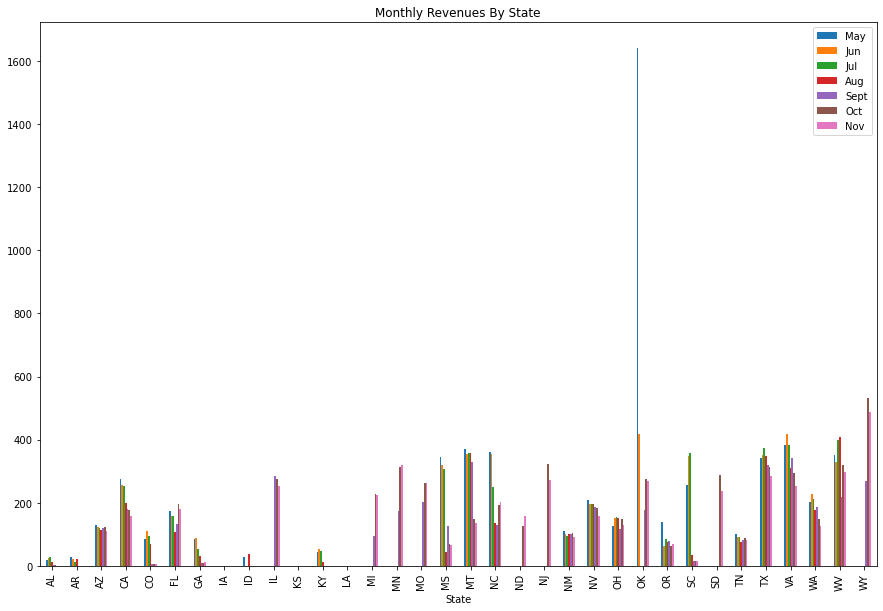

In [277]:
incomes.groupby('State')[['May', 'Jun', 'Jul', 'Aug',
       'Sept', 'Oct', 'Nov']].mean().plot(kind='bar', figsize=(15,10), title='Monthly Revenues By State')

In [330]:
counts

Unit Count
State            
TX           1089
CA           1038
AZ            900
FL            713
WA            543
NC            494
MI            363
LA            272
GA            218
KY            214
IL            209
VA            171
WV            151
MS            145
NV            125
TN            109
MO            106
SC             99
AL             97
NM             85
AR             74
MN             56
CO             56
ID             53
NJ             32
WY             30
SD             27
IA             27
MT             25
OR             24
ND             24
OK             20
KS             17
OH              7

In [399]:
tops_by = incomes[(incomes['TOTALS']>2000)&(incomes['TOTALS']<8000)]
tops_by['Location'] = tops_by['Location'].str.lower()
tops_by['Major Group'] = 0
tops_by.loc[(tops_by['Location'].str.contains('heb')), 'Major Group'] = 'HEB'
tops_by.loc[(tops_by['Location'].str.contains('circle')), 'Major Group'] = 'CIRCLE K'
tops_by.loc[(tops_by['Location'].str.contains('family')), 'Major Group'] = 'FAMILY DOLLAR'
x = tops_by.groupby('Major Group').count()[['TOTALS']].sort_values('TOTALS')
# x = x.iloc[:-1]
x

c:\Users\Laramie\anaconda3\envs\dev\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Laramie\anaconda3\envs\dev\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Laramie\anaconda3\envs\dev\envs\pyvizenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

TOTALS
Major Group          
CIRCLE K           93
FAMILY DOLLAR     121
HEB               225
0                 267

In [398]:
fig = px.bar(x, x=x.index, 
             y= 'TOTALS', title='Units With Over $2k Revenue, by State', color='TOTALS'
             )
fig.update_coloraxes(showscale=False)
fig.show()

In [378]:
tops_by.loc[(tops_by['Location'].str.contains('gas'))|(tops_by['Location'].str.contains('stop'))|(tops_by['Location'].str.contains('st'))]

Location             City State Zip Code  \
Device ID.1                                                                    
VJ300209588               heb plus store 099          HOUSTON    TX    77070   
VJ300292181               heb plus store 013  RIO GRANDE CITY    TX    78582   
VJ300106063  arco gas (deborah & twins inc.)      Los Angeles    CA    90047   
VJ400015432                     stop fast go          Phoenix    AZ    85031   
VJ300292027               heb plus store 094          MISSION    TX    78572   
VJ300374347                       choice gas       Sacramento    CA    95820   
VJ300292035               heb plus store 092         VICTORIA    TX    77901   
VJ300292095               heb plus store 020          CYPRESS    TX    77429   
VJ300010393                  one stop market       Sacramento    CA    95822   
VJ300374339                     herald store           Herald    CA    95638   
VJ300106041              dsp gas & food mart        San Diego    CA    92114   
VJ300374105                     just bargain           Rialto    CA    92376   
VJ300203685               heb plus store 014             KYLE    TX    78640   
VJ400005242                  la vista market            Vista    CA    92084   
VJ300357313       discount & 98 center store       Sacramento    CA    95820   
VJ300010363                  e street market   San Bernardino    CA    90640   
VJ300292078               heb plus store 092         VICTORIA    TX    77901   
VJ300284648               heb plus store 054          HOUSTON    TX    77075   
VJ300284832               heb plus store 108      SAN ANTONIO    TX    78258   
VJ300292482               heb plus store 592          LEANDER    TX    78641   
VJ300087278                    herbst liquor         Stockton    CA    95209   
VJ300374349              valero corner store      Castroville    CA    95012   
VJ300292383               heb plus store 057   CORPUS CHRISTI    TX    78418   
VJ300284692               heb plus store 063         PEARLAND    TX    77581   
VJ300292023               heb plus store 020          CYPRESS    TX    77429   
VJ300321809                     altadena gas         Altadena    CA    91001   
VJ300222171                   gull gas & oil         Ferndale    WA    98248   
VJ300010521                   stripes market          Lubbock    TX    79404   
VJ300216248               heb plus store 013  RIO GRANDE CITY    TX    78582   
VJ300292485               heb plus store 094          MISSION    TX    78572   
VJ300289068               heb plus store 099          HOUSTON    TX    77070   
VJ300158731          mario's westside market        Las Vegas    NV    89106   
VJ300106055          shell gas (rivkah inc.)      Los Angeles    CA    90037   
VJ300183747               heb plus store 084      SAN ANTONIO    TX    78224   
VJ300105465                       galaxy gas          Ontario    CA    91762   
VJ300292591               heb plus store 069   CORPUS CHRISTI    TX    78413   
VJ300105469                      star market      Victorville    CA    92395   
VJ300114022               stop n shop market          Phoenix    AZ    85029   
VJ300105470                 best mini market          Ontario    CA    91762   
VJ300284809               heb plus store 591       ROUND ROCK    TX    78664   
VJ300292364               heb plus store 591       ROUND ROCK    TX    78664   
VJ300183763               heb plus store 591       ROUND ROCK    TX    78664   

                 May     Jun     Jul      Aug    Sept      Oct     Nov  \
Device ID.1                                                              
VJ300209588    986.2   849.3 1,184.3  1,004.5   886.9  1,097.3 1,058.4   
VJ300292181  1,104.1 1,012.3 1,300.1  1,052.2    81.3    658.7 1,010.7   
VJ300106063  1,267.0 1,133.1   703.5    597.8   954.1  1,300.5 1,001.1   
VJ400015432    795.9   979.7   905.6    954.5 1,165.8  1,140.2   968.0   
VJ300292027    804.4   763.2 1,190.4  1,440.2 1,174.8  1,169.8   930.8 

In [336]:
tops_by_state= incomes[(incomes['TOTALS']>2000)&(incomes['TOTALS']<8000)].groupby('State').count()[['TOTALS']].sort_values('TOTALS', ascending=False)
tops_by_state = tops_by_state.merge(counts,how='inner', left_index=True, right_index=True)

tops_by_state['Percent of Units'] = tops_by_state['TOTALS']/tops_by_state['Unit Count'] 
fig = px.bar(tops_by_state, x=tops_by_state.index, 
             y= 'Percent of Units', title='Units With Over $2k Revenue, by State', color='Percent of Units'
             )
fig.layout.update(dict(showlegend=False))

tops_by_state

TOTALS  Unit Count      Percent of Units
State                                          
TX        300        1089   0.27548209366391185
CA        166        1038    0.1599229287090559
AZ         41         900   0.04555555555555556
WA         38         543   0.06998158379373849
MI         28         363   0.07713498622589532
NV         20         125                  0.16
FL         17         713  0.023842917251051893
IL         17         209   0.08133971291866028
NC         12         494  0.024291497975708502
TN          9         109   0.08256880733944955
WV          9         151  0.059602649006622516
MO          9         106   0.08490566037735849
MS          7         145   0.04827586206896552
NM          7          85   0.08235294117647059
WY          5          30   0.16666666666666666
MT          4          25                  0.16
OR          3          24                 0.125
SC          3          99  0.030303030303030304
VA          3         171  0.017543859649122806
MN          3          56   0.05357142857142857
OH          2           7    0.2857142857142857
NJ          2          32                0.0625
GA          1         218 0.0045871559633027525

In [275]:
mean_monthly_income = incomes.groupby('State')[['May', 'Jun', 'Jul', 'Aug',
       'Sept', 'Oct', 'Nov']].mean().round(2).sort_values('Nov', ascending=False).dropna()
counts = incomes.groupby('State')[['May', 'Jun', 'Jul', 'Aug',
       'Sept', 'Oct', 'Nov']].count().sort_values('Nov', ascending=False)[['Nov']]
counts = counts.rename(columns={'Nov':'Unit Count'})

mean_monthly_income.merge(counts, how='inner', left_index=True, right_index=True).sort_values(['Nov','Unit Count'], ascending=False)


May    Jun    Jul    Aug   Sept    Oct    Nov  Unit Count
State                                                               
WV      351.84 329.57  399.5 407.42 218.18  319.9 297.69         151
TX      343.05 351.46 373.51 348.77 320.66 313.16 283.86        1089
OK    1,639.31 418.25    0.0    0.0 178.62 276.16 270.88          20
VA      383.99 418.75 383.65 310.71 341.71 293.54 254.71         171
NC      360.21 355.71 248.94 136.86 129.76  192.0 202.77         494
FL       174.3  158.5 159.21  106.9  131.6 195.26 179.85         713
NV      209.54 195.79 197.39 195.88 185.64 185.06 158.47         125
CA      274.45 257.65 252.92 199.18 180.62 176.07  158.4        1038
MT      369.64 356.38 359.33 358.47 330.82 148.43 135.21          25
OH      127.31 150.91 155.66 152.05 116.28  149.2 130.77           7
WA      201.36 227.61  211.0 177.94 188.02 149.23 127.42         543
AZ      130.57 123.46 119.11 112.84 118.92 122.68 111.27         900
NM      109.79 100.05  95.85 101.98 101.65 103.21  92.51          85
TN      100.04  93.53  93.13  76.63  83.89  87.43  82.68         109
OR      138.61  63.18   86.7  75.38  78.98  64.33  70.23          24
MS      344.45  319.1 306.33  43.18 125.94  68.63  66.66         145
SC      256.58 348.48 356.88  34.53  14.84   14.7  15.93          99
GA       86.02  87.28  54.43  30.76  10.82   9.95  11.36         218
CO        87.1 109.55  93.62  69.18   6.02   5.81   6.35          56
AL       18.38  24.87  29.11  12.55   2.73   2.07   1.72          97
AR       29.25   22.5   13.5   21.0   0.43   0.69   0.77          74
KY       43.13  54.08  47.43  12.54   1.08   1.53   0.66         214
ID        29.2    0.0    0.0   37.4    0.0    0.0    0.0          53

<AxesSubplot:title={'center':'Monthly Revenues By State'}, xlabel='State'>

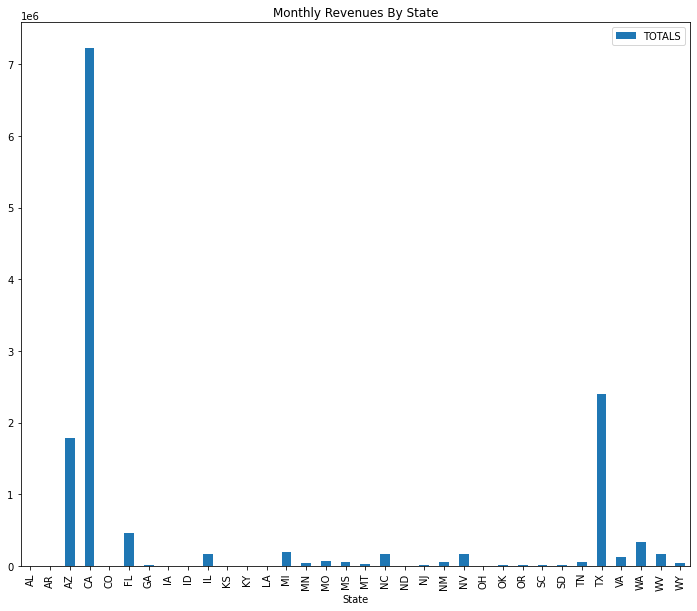

In [276]:
incomes.groupby('State')[['TOTALS']].sum().plot(kind='bar', figsize=(12,10), title='Monthly Revenues By State')

In [254]:
incomes.groupby('State')[['TOTALS']].sum().round(2).sort_values('TOTALS', ascending=False)

TOTALS
State             
CA    7,223,660.45
TX    2,407,000.73
AZ     1,780,658.6
FL       458,469.1
WA      336,601.86
MI      199,269.54
NC      173,209.83
IL      169,985.71
NV      165,970.91
WV      162,329.99
VA      127,490.85
MO        77,337.9
TN       59,839.55
NM        58,788.3
MS       49,630.13
MN       45,405.14
WY       38,711.65
MT       22,580.55
NJ        19,071.5
OK       16,570.78
GA       16,478.25
SD        14,241.4
OR       12,150.55
SC        12,137.6
OH        6,875.35
ND        6,863.03
CO        3,174.65
AL         1,906.3
KY        1,486.15
AR           312.0
ID           133.2
LA             0.0
KS             0.0
IA             0.0